In [92]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd

In [93]:
# Files to load
city_data_to_load = "Resources/city_data.csv"
ride_data_to_load = "Resources/ride_data.csv"
city_data_df = pd.read_csv(city_data_to_load)
#city_data_df.head(10)

In [94]:
ride_data_df = pd.read_csv(ride_data_to_load)
#ride_data_df.head(10)

In [95]:
city_data_df["type"].unique()

array(['Urban', 'Suburban', 'Rural'], dtype=object)

In [96]:
#sum(city_data_df["type"] == "Urban")

In [97]:
#sum(city_data_df["type"] == "Suburban")

In [98]:
#sum(city_data_df["type"] == "Rural")

In [99]:
#ride_data_df.dtypes

In [101]:
# Combine the data into a single dataset
pyber_data_df = pd.merge(ride_data_df, city_data_df, how="left", on=["city", "city"])

# Display the DataFrame
#pyber_data_df.head()

In [102]:
# Create the Urban Data Frame
urban_cities_df = pyber_data_df[pyber_data_df["type"] == "Urban"]
suburban_cities_df = pyber_data_df[pyber_data_df["type"] == "Suburban"]
rural_cities_df = pyber_data_df[pyber_data_df["type"] == "Rural"]
rural_cities_df.head()

,city,date,fare,ride_id,driver_count,type
2250,Randallchester,2019-04-13 11:13:31,43.22,1076079536213,9,Rural
2251,North Holly,2019-02-02 14:54:00,12.42,1985256326182,8,Rural
2252,Michaelberg,2019-03-27 18:27:34,54.85,4421836952718,6,Rural
2253,Lake Latoyabury,2019-02-23 21:12:24,47.90,3269652929887,2,Rural
2254,Lake Latoyabury,2019-05-06 08:57:56,51.80,4018025271936,2,Rural


In [103]:
# Get the number of rides for urban cities.
urban_ride_count = urban_cities_df.groupby(["city"]).count()["ride_id"]
suburban_ride_count = suburban_cities_df.groupby(["city"]).count()["ride_id"]
rural_ride_count = rural_cities_df.groupby(["city"]).count()["ride_id"]

In [104]:
urban_fare_avg = urban_cities_df.groupby(["city"]).mean()["fare"]
suburban_fare_avg = suburban_cities_df.groupby(["city"]).mean()["fare"]
rural_fare_avg = rural_cities_df.groupby(["city"]).mean()["fare"]

In [105]:
# Get the average number of drivers for each urban city.
urban_driver_count = urban_cities_df.groupby(["city"]).mean()["driver_count"]
suburban_driver_count = suburban_cities_df.groupby(["city"]).mean()["driver_count"]
rural_driver_count = rural_cities_df.groupby(["city"]).mean()["driver_count"]

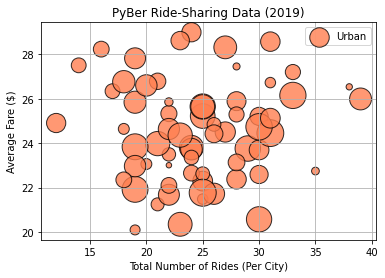

In [106]:
# Build the scatter plots for urban cities.
plt.scatter(urban_ride_count,
      urban_fare_avg,
      s=10*urban_driver_count, c="coral",
      edgecolor="black", linewidths=1,
      alpha=0.8, label="Urban")
plt.title("PyBer Ride-Sharing Data (2019)")
plt.ylabel("Average Fare ($)")
plt.xlabel("Total Number of Rides (Per City)")
plt.grid(True)
# Add the legend.
plt.legend()

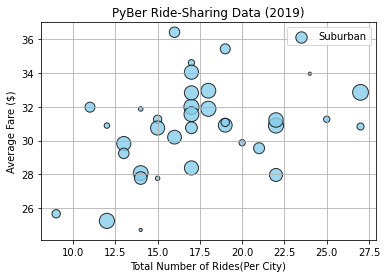

In [107]:
plt.scatter(suburban_ride_count, suburban_fare_avg, s=10*suburban_driver_count, c="skyblue", edgecolor="black", linewidths=1, alpha=0.8, label="Suburban")
plt.title("PyBer Ride-Sharing Data (2019)")
plt.ylabel("Average Fare ($)")
plt.xlabel("Total Number of Rides(Per City)")
plt.grid(True)

# Add the legend
plt.legend()

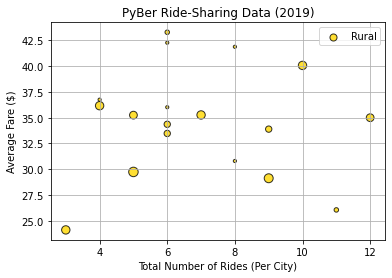

In [108]:
# Build the scatter plots for rural cities.
plt.scatter(rural_ride_count,
      rural_fare_avg,
      s=10*rural_driver_count, c="gold",
      edgecolor="black", linewidths=1,
      alpha=0.8, label="Rural")
plt.title("PyBer Ride-Sharing Data (2019)")
plt.ylabel("Average Fare ($)")
plt.xlabel("Total Number of Rides (Per City)")
plt.grid(True)
# Add the legend.
plt.legend()

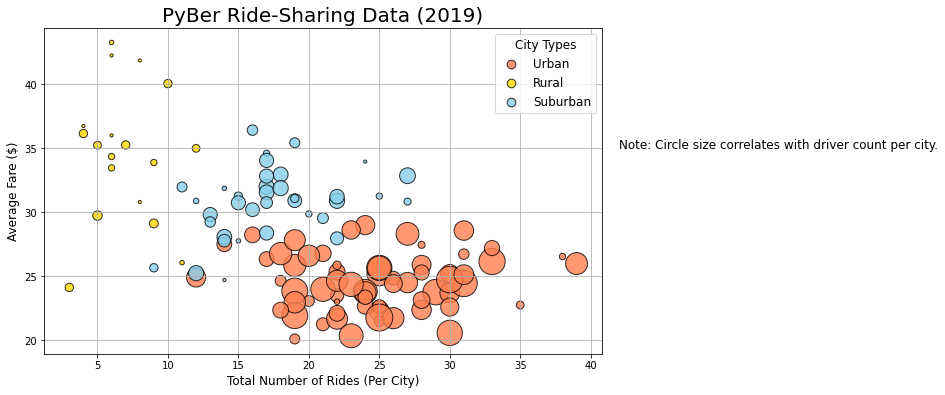

In [109]:
# Build the scatter charts for each city type.
plt.subplots(figsize=(10, 6))

plt.scatter(urban_ride_count,
      urban_fare_avg,
      s=10*urban_driver_count, c="coral",
      edgecolor="black", linewidths=1,
      alpha=0.8, label="Urban")

plt.scatter(rural_ride_count,
      rural_fare_avg,
      s=10*rural_driver_count, c="gold",
      edgecolor="black", linewidths=1,
      alpha=0.8, label="Rural")

plt.scatter(suburban_ride_count, suburban_fare_avg, s=10*suburban_driver_count, c="skyblue", edgecolor="black", linewidths=1, alpha=0.8, label="Suburban")

# Incorporate the other graph properties
plt.title("PyBer Ride-Sharing Data (2019)", fontsize=20)
plt.ylabel("Average Fare ($)", fontsize=12)
plt.xlabel("Total Number of Rides (Per City)", fontsize=12)
plt.grid(True)

# Create a legend
lgnd = plt.legend(fontsize="12", mode="Expanded",
         scatterpoints=1, loc="best", title="City Types")
lgnd.legendHandles[0]._sizes = [75]
lgnd.legendHandles[1]._sizes = [75]
lgnd.legendHandles[2]._sizes = [75]
lgnd.get_title().set_fontsize(12)

# Incorporate a text label about circle size.
plt.text(42, 35, "Note: Circle size correlates with driver count per city.", fontsize="12")

# Show the plot
plt.show()

In [81]:
# Save the figure.
plt.savefig("Resources/Fig1.png")

<Figure size 432x288 with 0 Axes>

In [110]:
# Get summary statistics
urban_cities_df.describe()

,fare,ride_id,driver_count
count,1625.000000,1.625000e+03,1625.000000
mean,24.525772,4.873485e+12,36.678154
std,11.738649,2.907440e+12,20.075545
min,4.050000,1.458810e+10,3.000000
25%,14.550000,2.400244e+12,22.000000
50%,24.640000,4.711188e+12,37.000000
75%,34.580000,7.451579e+12,52.000000
max,44.970000,9.991538e+12,73.000000


In [111]:
suburban_cities_df.describe()

,fare,ride_id,driver_count
count,625.000000,6.250000e+02,625.000000
mean,30.970128,4.971015e+12,13.712000
std,10.677508,2.912410e+12,8.042372
min,12.050000,3.218337e+08,1.000000
25%,21.970000,2.364253e+12,5.000000
50%,30.750000,5.053221e+12,16.000000
75%,39.830000,7.551674e+12,21.000000
max,49.960000,9.917744e+12,25.000000


In [113]:
rural_cities_df.describe()

,fare,ride_id,driver_count
count,125.000000,1.250000e+02,125.000000
mean,34.623440,4.647746e+12,4.296000
std,14.558046,2.887834e+12,2.691156
min,10.110000,2.684873e+10,1.000000
25%,19.900000,2.275364e+12,1.000000
50%,37.050000,4.023962e+12,4.000000
75%,47.070000,7.118047e+12,7.000000
max,58.550000,9.990581e+12,9.000000


In [115]:
# Get summary Stats
urban_ride_count.describe()

count    66.000000
mean     24.621212
std       5.408726
min      12.000000
25%      21.000000
50%      24.000000
75%      28.000000
max      39.000000
Name: ride_id, dtype: float64

In [114]:
# Calculate the mean of the ride count for each city type.
round(urban_ride_count.mean(),2), round(suburban_ride_count.mean(),2), round(rural_ride_count.mean(),2)

(24.62, 17.36, 6.94)

In [116]:
# Calculate the median ride count for each city type.
round(urban_ride_count.median(), 2), round(suburban_ride_count.median(),2), round(rural_ride_count.median(),2)

(24.0, 17.0, 6.0)

In [118]:
# Calculate the median ride count for each city type
urban_ride_count.mode(), suburban_ride_count.mode(), rural_ride_count.mode()

(0    22
 1    25
 dtype: int64,
 0    17
 dtype: int64,
 0    6
 dtype: int64)

In [119]:
# Import NumPy and the stats module from SciPy.
import numpy as np
import scipy.stats as sts

In [120]:
# Calculate the measures of central tendency for the ride count for the urban cities.
mean_urban_ride_count = np.mean(urban_ride_count)
print(f"The mean for the ride counts for urban trips is {mean_urban_ride_count:.2f}.")

median_urban_ride_count = np.median(urban_ride_count)
print(f"The median for the ride counts for urban trips is {median_urban_ride_count}.")

mode_urban_ride_count = sts.mode(urban_ride_count)
print(f"The mode for the ride counts for urban trips is {mode_urban_ride_count}.")

The mean for the ride counts for urban trips is 24.62.
The median for the ride counts for urban trips is 24.0.
The mode for the ride counts for urban trips is ModeResult(mode=array([22]), count=array([7])).


In [121]:
# Calculate the measures of central tendency for the ride count for the urban cities.
mean_suburban_ride_count = np.mean(suburban_ride_count)
print(f"The mean for the ride counts for urban trips is {mean_suburban_ride_count:.2f}.")

median_suburban_ride_count = np.median(suburban_ride_count)
print(f"The median for the ride counts for urban trips is {median_suburban_ride_count}.")

mode_suburban_ride_count = sts.mode(suburban_ride_count)
print(f"The mode for the ride counts for urban trips is {mode_suburban_ride_count}.")

The mean for the ride counts for urban trips is 17.36.
The median for the ride counts for urban trips is 17.0.
The mode for the ride counts for urban trips is ModeResult(mode=array([17]), count=array([7])).


In [122]:
# Calculate the measures of central tendency for the ride count for the urban cities.
mean_rural_ride_count = np.mean(rural_ride_count)
print(f"The mean for the ride counts for urban trips is {mean_rural_ride_count:.2f}.")

median_rural_ride_count = np.median(rural_ride_count)
print(f"The median for the ride counts for urban trips is {median_rural_ride_count}.")

mode_rural_ride_count = sts.mode(rural_ride_count)
print(f"The mode for the ride counts for urban trips is {mode_rural_ride_count}.")

The mean for the ride counts for urban trips is 6.94.
The median for the ride counts for urban trips is 6.0.
The mode for the ride counts for urban trips is ModeResult(mode=array([6]), count=array([5])).


In [123]:
# Get the fares for the urban cities.
urban_fares = urban_cities_df["fare"]
urban_fares.head()

0    13.83
1    30.24
2    33.44
3    23.44
4    34.58
Name: fare, dtype: float64

In [124]:
# Calculate the measures of central tendency for the average fare for the urban cities.
mean_urban_fares = np.mean(urban_fares)
print(f"The mean fare price for urban trips is ${mean_urban_fares:.2f}.")

median_urban_fares = np.median(urban_fares)
print(f"The median fare price for urban trips is ${median_urban_fares:.2f}.")

mode_urban_fares = sts.mode(urban_fares)
print(f"The mode fare price for urban trips is {mode_urban_fares}.")

The mean fare price for urban trips is $24.53.
The median fare price for urban trips is $24.64.
The mode fare price for urban trips is ModeResult(mode=array([22.86]), count=array([5])).


In [128]:
#Get the fares for the suburban cities
suburban_fares = suburban_cities_df["fare"]

# Calculate the measures of central tendency for the average fare for the urban cities.
mean_suburban_fares = np.mean(suburban_fares)
print(f"The mean fare price for suburban trips is ${mean_suburban_fares:.2f}.")

median_suburban_fares = np.median(suburban_fares)
print(f"The median fare price for suburban trips is ${median_suburban_fares:.2f}.")

mode_suburban_fares = sts.mode(suburban_fares)
print(f"The mode fare price for suburban trips is {mode_suburban_fares}.")


The mean fare price for suburban trips is $30.97.
The median fare price for suburban trips is $30.75.
The mode fare price for suburban trips is ModeResult(mode=array([17.99]), count=array([3])).


In [129]:
#Get the fares for the rural cities
rural_fares = rural_cities_df["fare"]

# Calculate the measures of central tendency for the average fare for the urban cities.
mean_rural_fares = np.mean(rural_fares)
print(f"The mean fare price for rural trips is ${mean_rural_fares:.2f}.")

median_rural_fares = np.median(rural_fares)
print(f"The median fare price for rural trips is ${median_rural_fares:.2f}.")

mode_rural_fares = sts.mode(rural_fares)
print(f"The mode fare price for rural trips is {mode_rural_fares}.")

The mean fare price for rural trips is $34.62.
The median fare price for rural trips is $37.05.
The mode fare price for rural trips is ModeResult(mode=array([37.05]), count=array([2])).


In [133]:
# Get the driver count data from the urban cities.
urban_drivers = urban_cities_df['driver_count']
suburban_drivers = suburban_cities_df["driver_count"]
rural_drivers = rural_cities_df["driver_count"]

In [143]:
# Calculate the measures of central tendency for the number of drivers for the urban cities.
mean_urban_drivers = np.mean(urban_drivers)
print(f"The mean for number of drivers for urban trips is {mean_urban_drivers:.0f}.")

median_urban_drivers = np.median(urban_drivers)
print(f"The median for number of drivers  for urban trips is {median_urban_drivers:.0f}.")

mode_urban_drivers = sts.mode(urban_drivers)
print(f"The mode for number of drivers for urban trips is {mode_urban_drivers}.")

The mean for number of drivers for urban trips is 37.
The median for number of drivers  for urban trips is 37.
The mode for number of drivers for urban trips is ModeResult(mode=array([39]), count=array([86])).


In [142]:
# Calculate the measures of central tendency for the number of drivers for the suburban cities.
mean_suburban_drivers = np.mean(suburban_drivers)
print(f"The mean number of drivers for suburban trips is {mean_suburban_drivers:.0f}.")

median_suburban_drivers = np.median(suburban_drivers)
print(f"The median number of drivers for suburban trips is {median_suburban_drivers:.0f}.")

mode_suburban_drivers = sts.mode(suburban_drivers)
print(f"The mode number of drivers for suburban trips is {mode_suburban_drivers}.")

The mean number of drivers for suburban trips is 14.
The median number of drivers for suburban trips is 16.
The mode number of drivers for suburban trips is ModeResult(mode=array([20]), count=array([79])).


In [145]:
# Calculate the measures of central tendency for the number of drivers for the rural cities.
mean_rural_drivers = np.mean(rural_drivers)
print(f"The mean number of drivers for rural trips is ${mean_rural_drivers:.0f}.")

median_rural_drivers = np.median(rural_drivers)
print(f"The median number of drivers for rural trips is ${median_rural_drivers:.0f}.")

mode_rural_drivers = sts.mode(rural_drivers)
print(f"The mode number of drivers for rural trips is {mode_rural_drivers}.")

The mean number of drivers for rural trips is $4.
The median number of drivers for rural trips is $4.
The mode number of drivers for rural trips is ModeResult(mode=array([1]), count=array([32])).


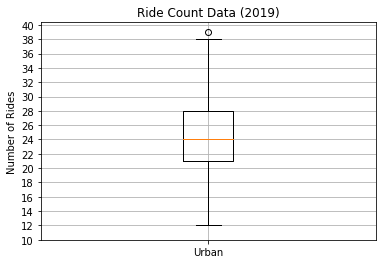

In [146]:
# Create a box-and-whisker plot for the urban cities ride count.
x_labels = ["Urban"]
fig, ax = plt.subplots()
ax.boxplot(urban_ride_count, labels=x_labels)
# Add the title, y-axis label and grid.
ax.set_title('Ride Count Data (2019)')
ax.set_ylabel('Number of Rides')
ax.set_yticks(np.arange(10, 41, step=2.0))
ax.grid()
plt.show()

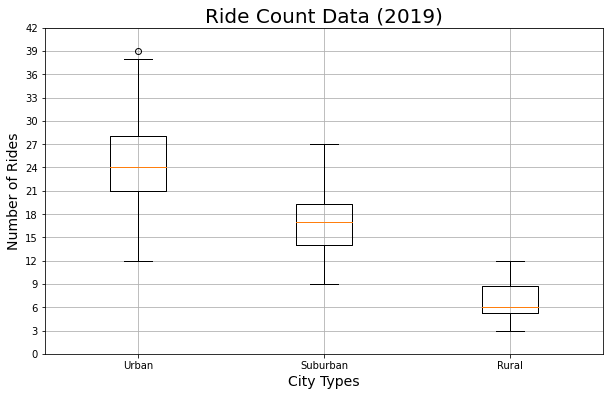

In [147]:
# Add all ride count box-and-whisker plots to the same graph.
x_labels = ["Urban", "Suburban","Rural"]
ride_count_data = [urban_ride_count, suburban_ride_count, rural_ride_count]
fig, ax = plt.subplots(figsize=(10, 6))
ax.set_title('Ride Count Data (2019)',fontsize=20)
ax.set_ylabel('Number of Rides',fontsize=14)
ax.set_xlabel("City Types",fontsize=14)
ax.boxplot(ride_count_data, labels=x_labels)
ax.set_yticks(np.arange(0, 45, step=3.0))
ax.grid()
# Save the figure.
plt.savefig("Resources/Fig2.png")
plt.show()

In [148]:
# Get the city that matches 39.
urban_city_outlier = urban_ride_count[urban_ride_count==39].index[0]
print(f"{urban_city_outlier} has the highest rider count.")

West Angela has the highest rider count.


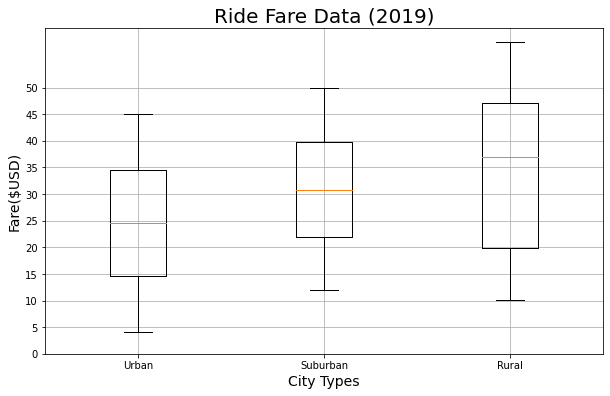

In [151]:
# Create a box-and-whisker plot for the fare data.
x_labels = ["Urban", "Suburban","Rural"]
fare_data = [urban_fares, suburban_fares, rural_fares]
fig, ax = plt.subplots(figsize=(10, 6))
ax.set_title('Ride Fare Data (2019)',fontsize=20)
ax.set_ylabel('Fare($USD)',fontsize=14)
ax.set_xlabel("City Types",fontsize=14)
ax.boxplot(fare_data, labels=x_labels)
ax.set_yticks(np.arange(0, 51, step=5.0))
ax.grid()
# Save the figure.
plt.savefig("Resources/Fig3.png")
plt.show()

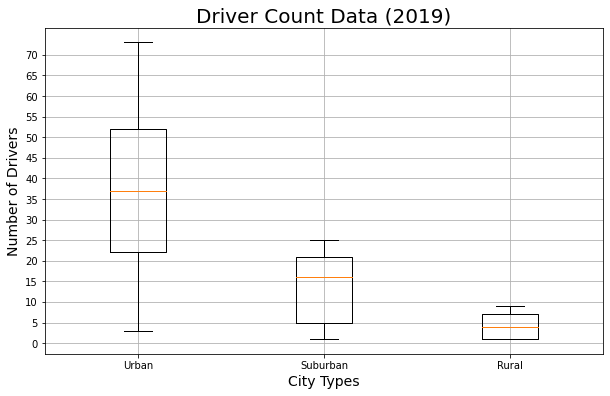

In [153]:
# Create a box-and-whisker plot for the driver count data.
x_labels = ["Urban", "Suburban","Rural"]
drivers_data = [urban_drivers, suburban_drivers, rural_drivers]
fig, ax = plt.subplots(figsize=(10, 6))
ax.set_title('Driver Count Data (2019)',fontsize=20)
ax.set_ylabel('Number of Drivers',fontsize=14)
ax.set_xlabel("City Types",fontsize=14)
ax.boxplot(drivers_data, labels=x_labels)
ax.set_yticks(np.arange(0, 75, step=5.0))
ax.grid()
# Save the figure.
plt.savefig("Resources/Fig4.png")
plt.show()

In [156]:
# Get the sum of fares for each city type.
sum_fares_by_type = pyber_data_df.groupby(["type"]).sum()["fare"]
#sum_fares_by_type

type
Rural        4327.93
Suburban    19356.33
Urban       39854.38
Name: fare, dtype: float64

In [160]:
# Calculate the percentage of fare for each city type.
type_percents = 100 * pyber_data_df.groupby(["type"]).sum()["fare"] / pyber_data_df["fare"].sum()
type_percents

type
Rural        6.811493
Suburban    30.463872
Urban       62.724635
Name: fare, dtype: float64

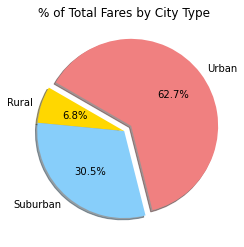

In [162]:
# Build the percentage of fares by city type pie chart.
plt.pie(type_percents,
    labels=["Rural", "Suburban", "Urban"],
    colors=["gold", "lightskyblue", "lightcoral"],
    explode=[0, 0, 0.1],
    autopct='%1.1f%%',
    shadow=True, startangle=150)
plt.title("% of Total Fares by City Type")
# Show Figure
plt.show()

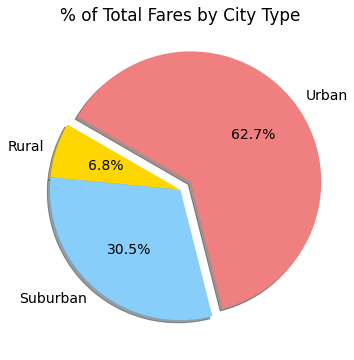

In [164]:
# Import mpl to change the plot configurations using rcParams.
import matplotlib as mpl
# Build Pie Chart
plt.subplots(figsize=(10, 6))
plt.pie(type_percents,
    labels=["Rural", "Suburban", "Urban"],
    colors=["gold", "lightskyblue", "lightcoral"],
    explode=[0, 0, 0.1],
    autopct='%1.1f%%',
    shadow=True, startangle=150)
plt.title("% of Total Fares by City Type")
# Change the default font size from 10 to 14.
mpl.rcParams['font.size'] = 14
# Save Figure
plt.savefig("Resources/Fig5.png")
# Show Figure
plt.show()